**THIS NOOTBOOK WAS CREATED TO PRACTICE DATA SCIENCE SKILLS AND WAS BASED ON Daniel Bourke Youtube SESSION**

https://www.youtube.com/watch?v=f1y9wDDxWnA

In [124]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

**Importing Train and Test Data**

Read the datasets and creating train and test datasets to work and 'see' it

Perform operations like head() or len(ds)

In [125]:
# Import train & test data 
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')
gender_submission = pd.read_csv('input/gender_submission.csv') # example of what a submission should look like

In [126]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [127]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [128]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


**OK, so...**

Yes, we saw the data but now what? 

We have 3 datasets, train, test, and gender_submission. Basicly we will use the **train** dataset to learn about the data and discover insides that let us build some machine learning models that we will use on the test dataset. The **test** dataset will be our dataset to prouf if our machine learning models will work or not. If que can predict correctly the survive probability of the test users, we will get a good machine learning model to submit. And that result will be saved into the **gender_submission** dataset as the result of our analysis. 

**TRAIN Dataset EDA**

In [129]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


train.describe() will give us a sense of knowleged about how is or dataset. Rows count in column, standard deviation, max value in the column. 

For example, we quicky could see how the count of the column **Age** is lower that the others. This give us a hint about the posibility of missing values on our datasets.

This is **REALLY IMPORTANT** because, probably we need to do something with thoose holes in or data.

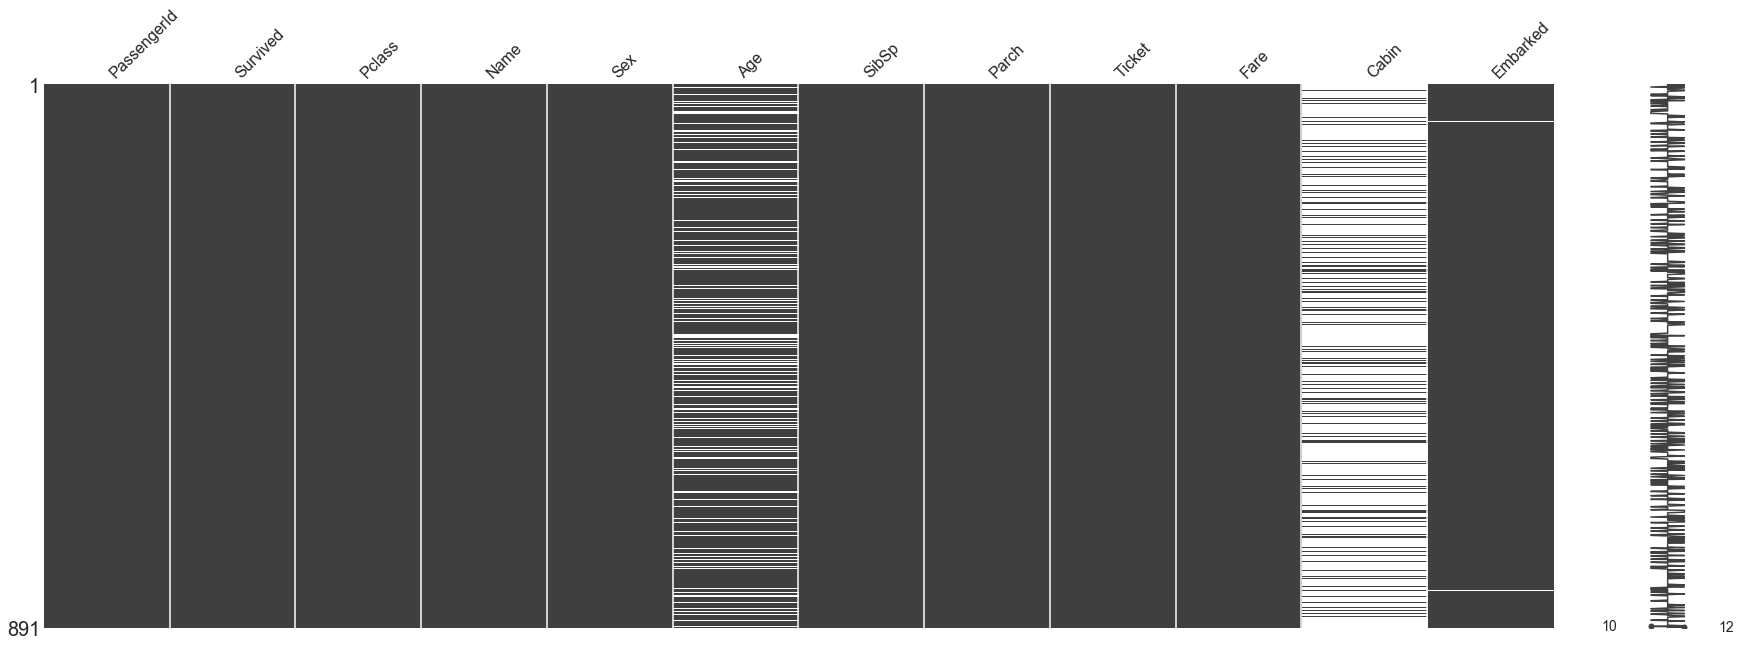

In [130]:
# Plot graphic of missing values
missingno.matrix(train, figsize = (30,10))

The *missingno.matrix* function draw a graphic that let us know where are the holes on our dataset. 

In [131]:
# Alternatively, you can see the number of missing values like this
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Starting with Data Analysis**

To perform the data analysis we will create two datasets, one for Discretised continuos variables and another for continuous variables.

In [132]:
df_bin = pd.DataFrame() # for discretised continuous variables
df_con = pd.DataFrame() # for continuous variables

Each column of the dataset is a feature of the passanger. So it is important to explore every on to find insides that we could use on our models.

**Feature SURVIVED - TARGET FEATURE**

This is an important one. This feature is what we want to predict, so we need to understand well how this feature can be afected by the other features. 

Survived = 1 then survived

Survived = 0 then did not survived

0    549
1    342
Name: Survived, dtype: int64


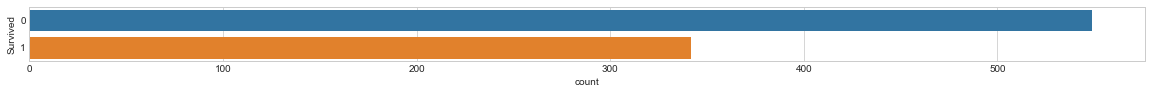

In [133]:
# How many people survived?
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=train);
print(train.Survived.value_counts())

What we learn from this? This graphic reflects that more people did not survived that thoose who survived, so if in our prediction this tendency is not refected probably our prediction is not correct. 

In [134]:
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

In [135]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [136]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


**Feature PCLASS**

This is the class of the accomodation of the passanger. Can have three posible values: 1, 2, 3.

3    491
1    216
2    184
Name: Pclass, dtype: int64


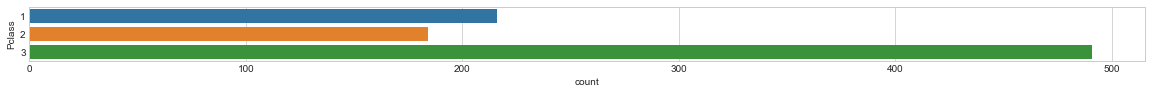

In [137]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Pclass', data=train);
print(train.Pclass.value_counts())

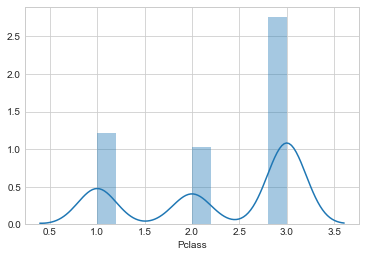

In [138]:
sns.distplot(train.Pclass)

In [139]:
#Pclass have missing values?
train.Pclass.isnull().sum()

0

No missing values, so lets add this feature to our datasets

In [140]:
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

In [141]:
df_bin.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [142]:
df_con.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


**Feature NAME**

In [143]:
train.Name.value_counts()

Jonsson, Mr. Carl                                                      1
Leeni, Mr. Fahim ("Philip Zenni")                                      1
Montvila, Rev. Juozas                                                  1
Kelly, Mr. James                                                       1
Norman, Mr. Robert Douglas                                             1
Razi, Mr. Raihed                                                       1
Beane, Mrs. Edward (Ethel Clarke)                                      1
Hogeboom, Mrs. John C (Anna Andrews)                                   1
Andersson, Miss. Sigrid Elisabeth                                      1
Sobey, Mr. Samuel James Hayden                                         1
Boulos, Mrs. Joseph (Sultana)                                          1
Hays, Miss. Margaret Bechstein                                         1
Ivanoff, Mr. Kanio                                                     1
Albimona, Mr. Nassef Cassem                        

It seems that every passanger has a different name, so I dont see any relation with the target feature. 

**Feature SEX**

key 1 = Male
key 2 = Female

male      577
female    314
Name: Sex, dtype: int64


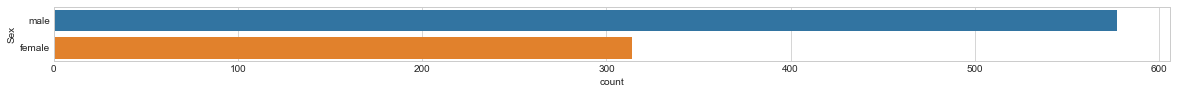

In [144]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Sex', data=train);
print(train.Sex.value_counts())

In [145]:
#Missing values
train.Sex.isnull().sum()

0

In [146]:
df_bin["Gender"] = train["Sex"]
df_bin["Gender"] = np.where(df_bin["Gender"] == 'female', 1, 0) #Doing this we can sumarize the data and comparing it with other features, like Survived ;)
df_con["Gender"] = train["Sex"]

In [147]:
df_bin.head()

,Survived,Pclass,Gender
0,0,3,0
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,0


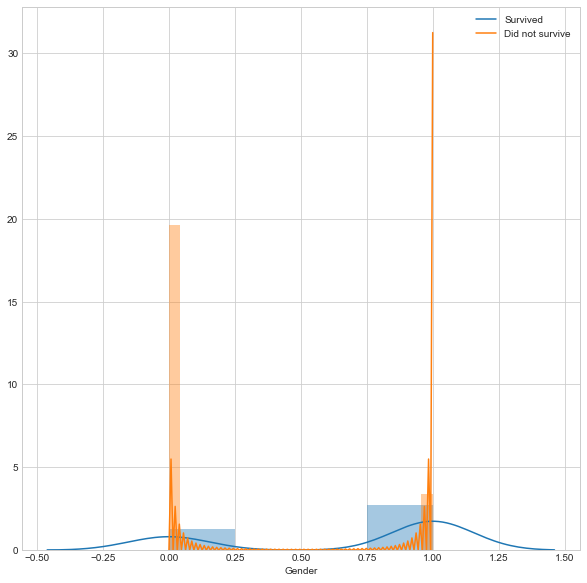

In [148]:
#Les compare the survived feature with the gender
fig = plt.figure(figsize=(10, 10))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Gender'], kde_kws={'label': 'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Gender'], kde_kws={'label': 'Did not survive'});

**Feature AGE**

Les see if we can find an inside from the age of the passangers

In [149]:
#Checking missing values
train.Age.isnull().sum()

177

In [150]:
train.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

Not so much to this right now with this column. 

**Feature SibSp**

The number of sibilings/spouses the passanger had

In [151]:
train.SibSp.head()

0    1
1    1
2    0
3    1
4    0
Name: SibSp, dtype: int64

In [152]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

It seems like there is not so much segments to explore. Lets see how this is related with the survived feature.

In [153]:
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

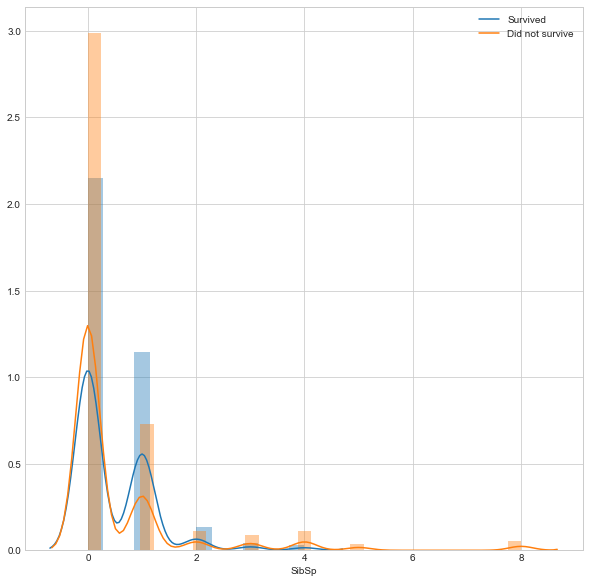

In [154]:
#Les compare the survived feature with the SibSp
fig = plt.figure(figsize=(10, 10))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['SibSp'], kde_kws={'label': 'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['SibSp'], kde_kws={'label': 'Did not survive'});

This is interesting, it seems like if you dont had any sibilings you also had more chances to did not survive. But if you had 1 o 2, there is more chances to survived than not survive

**Feature PARCH**

Is the number of children or parents that the passanger had

In [155]:
train.Parch.isnull().sum()

0

In [156]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [157]:
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

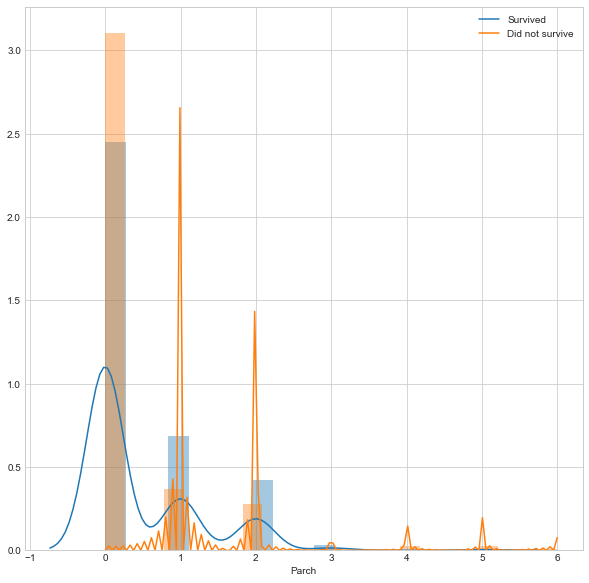

In [158]:
#Les compare the survived feature with the SibSp
fig = plt.figure(figsize=(10, 10))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Parch'], kde_kws={'label': 'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Parch'], kde_kws={'label': 'Did not survive'});

It seems is pretty similar to the SibSp feature, lets compare them.

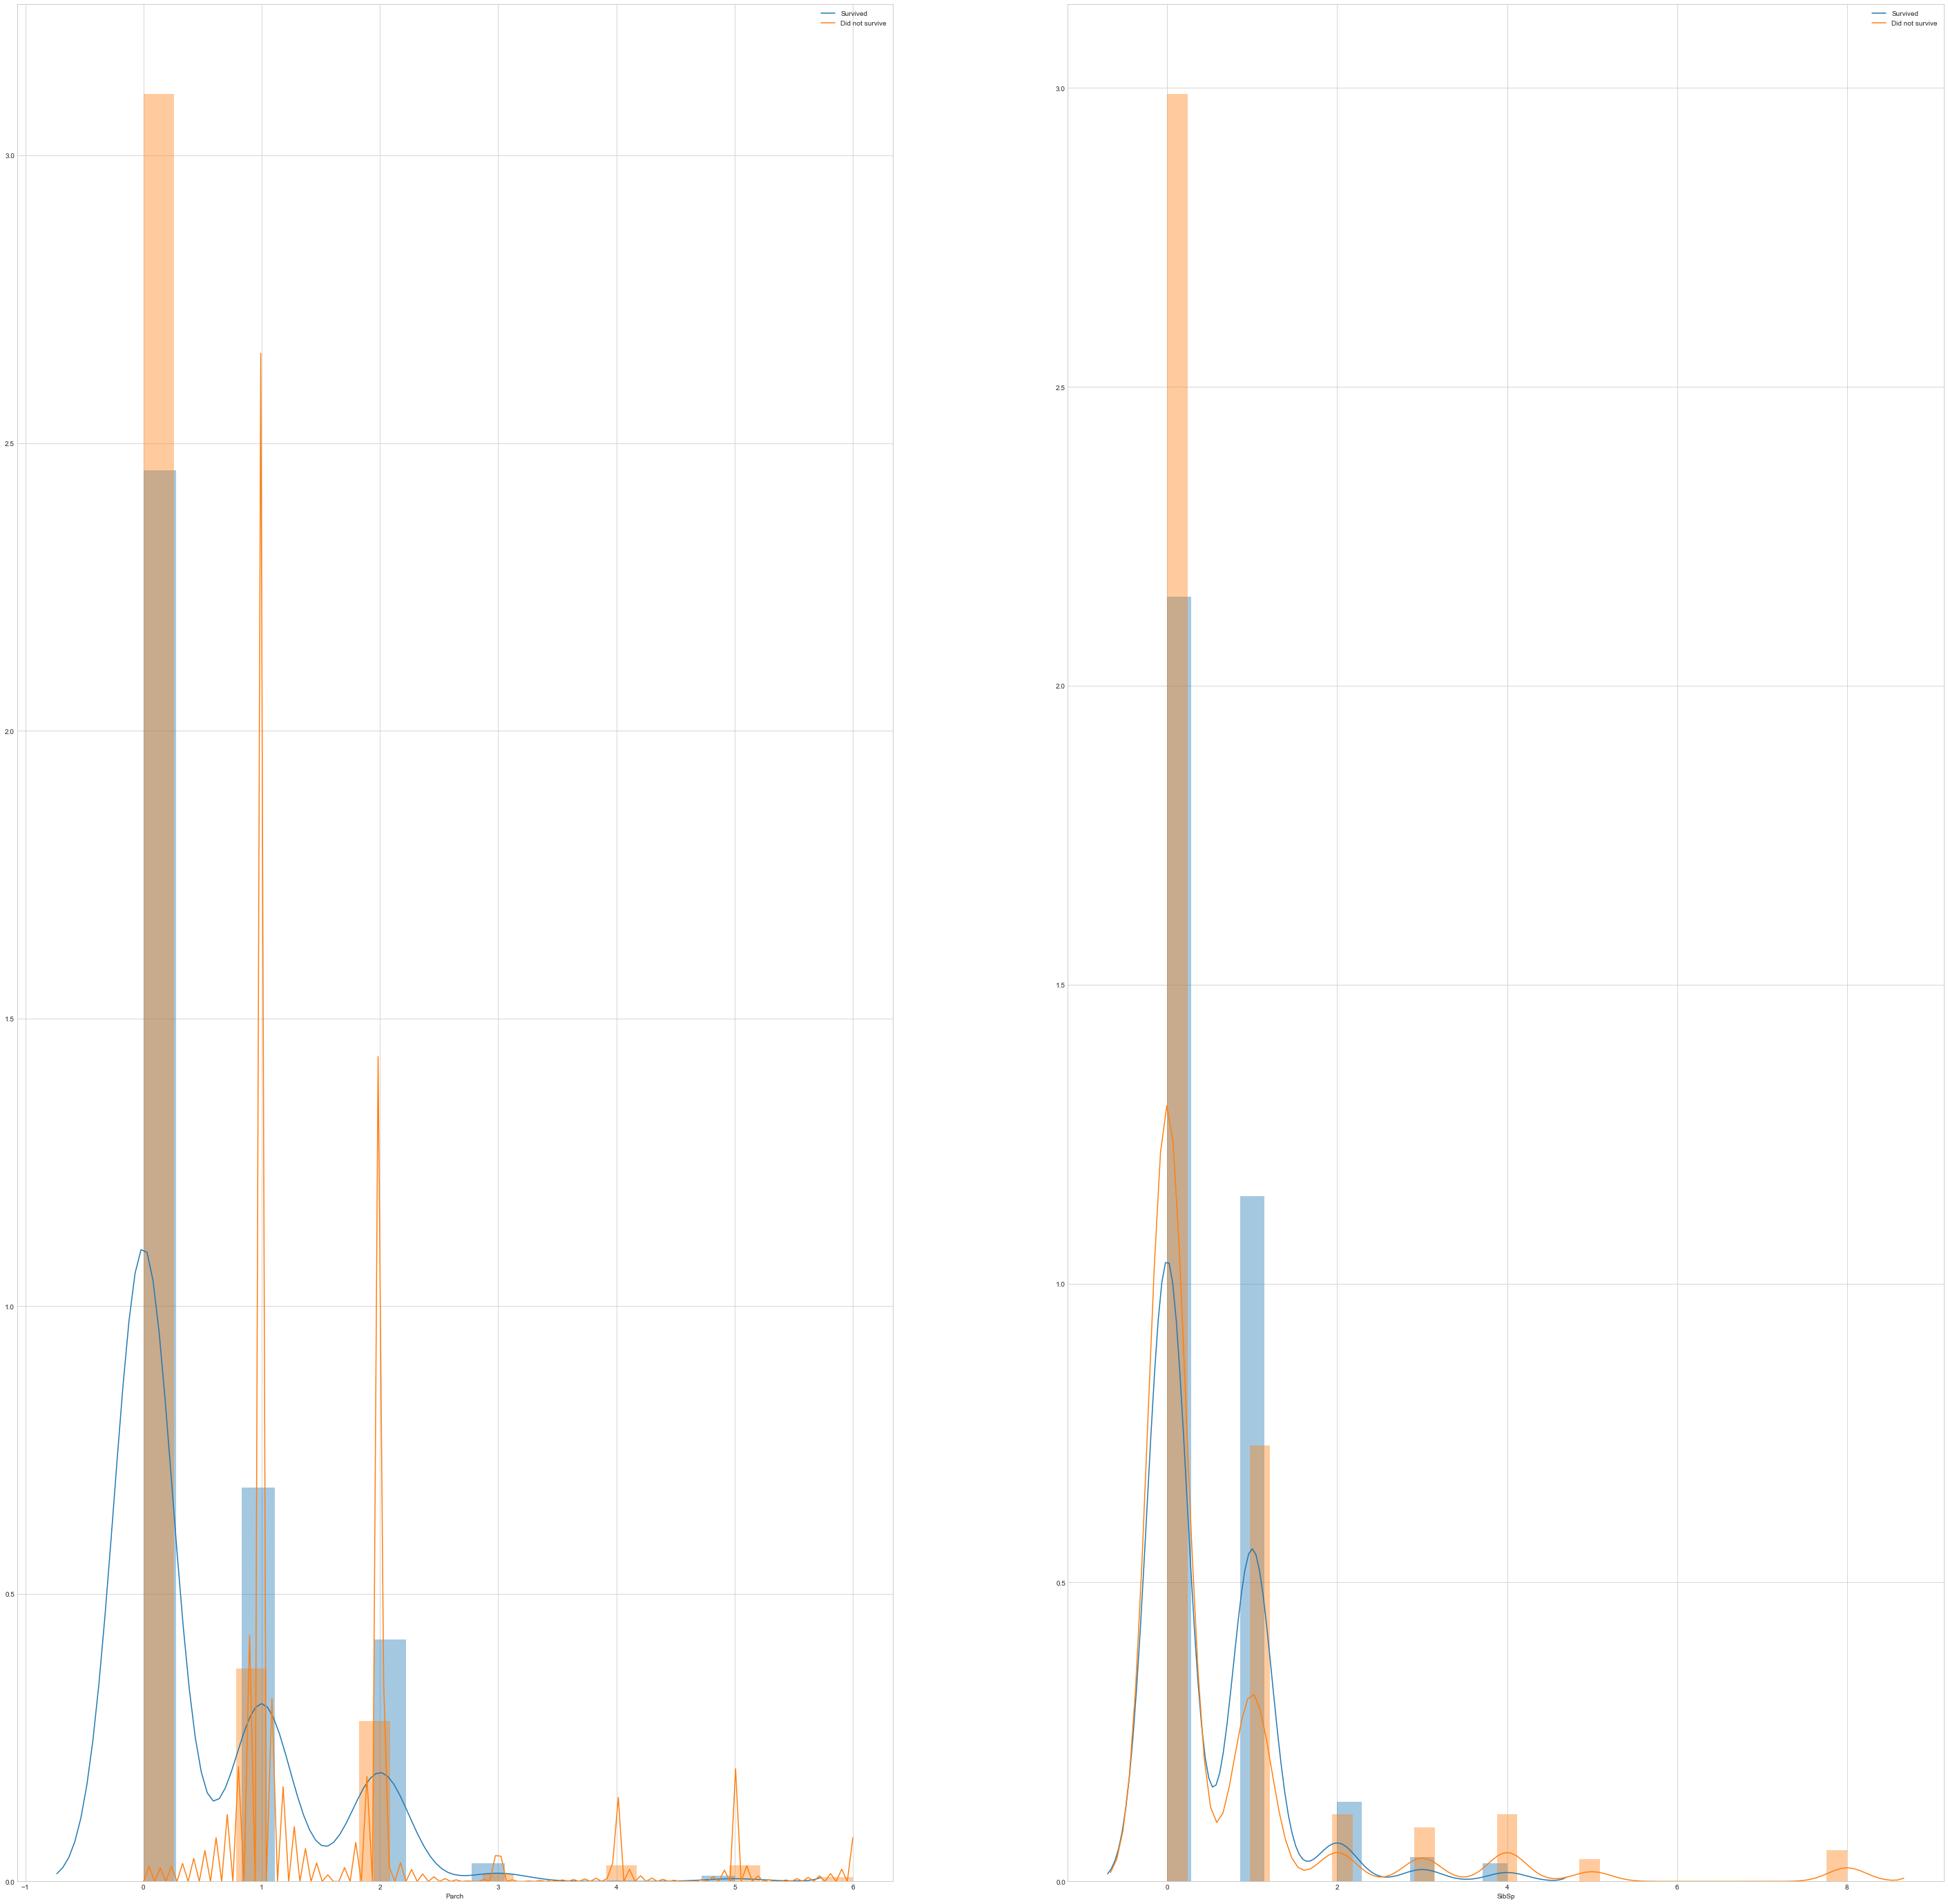

In [159]:
#Lets compare the survived feature with the SibSp
fig = plt.figure(figsize=(50, 50))
plt.subplot(1, 2, 1)
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Parch'], kde_kws={'label': 'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Parch'], kde_kws={'label': 'Did not survive'});
plt.subplot(1, 2, 2)
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['SibSp'], kde_kws={'label': 'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['SibSp'], kde_kws={'label': 'Did not survive'});


In [160]:
df_bin.head()

,Survived,Pclass,Gender,SibSp,Parch
0,0,3,0,1,0
1,1,1,1,1,0
2,1,3,1,0,0
3,1,1,1,1,0
4,0,3,0,0,0


In [161]:
df_con.head()

,Survived,Pclass,Gender,SibSp,Parch
0,0,3,male,1,0
1,1,1,female,1,0
2,1,3,female,0,0
3,1,1,female,1,0
4,0,3,male,0,0


**Feature TICKET**

In [162]:
train.Ticket.isnull().sum()

0

In [163]:
train.Ticket.value_counts()

CA. 2343             7
347082               7
1601                 7
3101295              6
CA 2144              6
347088               6
S.O.C. 14879         5
382652               5
W./C. 6608           4
4133                 4
19950                4
113781               4
113760               4
349909               4
17421                4
LINE                 4
347077               4
PC 17757             4
2666                 4
347742               3
C.A. 34651           3
PC 17760             3
SC/Paris 2123        3
248727               3
PC 17755             3
PC 17572             3
24160                3
239853               3
363291               3
PC 17582             3
                    ..
345780               1
8471                 1
C 7075               1
S.P. 3464            1
350050               1
349245               1
367231               1
330877               1
SOTON/OQ 3101317     1
C.A. 33111           1
PC 17595             1
349223               1
113510     

Can we group this tickets in some way?

**Feature FARE**

How much cost the ticket.

In [164]:
train.Fare.isnull().sum()

0

In [165]:
train.Fare.value_counts()

8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
26.5500     15
0.0000      15
7.2292      15
7.8542      13
8.6625      13
7.2500      13
7.2250      12
16.1000      9
9.5000       9
24.1500      8
15.5000      8
56.4958      7
52.0000      7
14.5000      7
14.4542      7
69.5500      7
7.0500       7
31.2750      7
46.9000      6
30.0000      6
7.7958       6
39.6875      6
            ..
7.1417       1
42.4000      1
211.5000     1
12.2750      1
61.1750      1
8.4333       1
51.4792      1
7.8875       1
8.6833       1
7.5208       1
34.6542      1
28.7125      1
25.5875      1
7.7292       1
12.2875      1
8.6542       1
8.7125       1
61.3792      1
6.9500       1
9.8417       1
8.3000       1
13.7917      1
9.4750       1
13.4167      1
26.3875      1
8.4583       1
9.8375       1
8.3625       1
14.1083      1
17.4000      1
Name: Fare, Length: 248, dtype: int64

In [166]:
df_con['Fare'] = train['Fare']
df_bin['Fare'] = pd.cut(train['Fare'], bins=5)

In [167]:
df_con.head()

,Survived,Pclass,Gender,SibSp,Parch,Fare
0,0,3,male,1,0,7.2500
1,1,1,female,1,0,71.2833
2,1,3,female,0,0,7.9250
3,1,1,female,1,0,53.1000
4,0,3,male,0,0,8.0500


In [168]:
df_bin.head()

,Survived,Pclass,Gender,SibSp,Parch,Fare
0,0,3,0,1,0,"(-0.512, 102.466]"
1,1,1,1,1,0,"(-0.512, 102.466]"
2,1,3,1,0,0,"(-0.512, 102.466]"
3,1,1,1,1,0,"(-0.512, 102.466]"
4,0,3,0,0,0,"(-0.512, 102.466]"


In [169]:
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

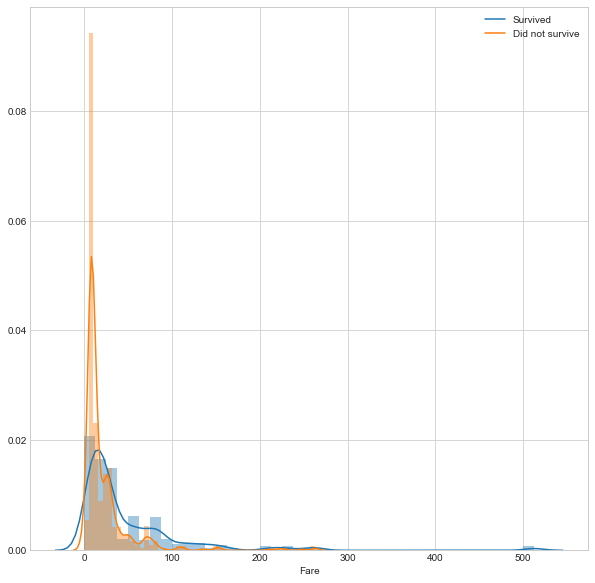

In [170]:
#Les compare the survived feature with the SibSp
fig = plt.figure(figsize=(10, 10))
sns.distplot(train.loc[df_bin['Survived'] == 1]['Fare'], kde_kws={'label': 'Survived'});
sns.distplot(train.loc[df_bin['Survived'] == 0]['Fare'], kde_kws={'label': 'Did not survive'});

**Feature CABIN**

In [171]:
train.Cabin.isnull().sum()

687

In [172]:
train.Cabin.value_counts()

B96 B98            4
G6                 4
C23 C25 C27        4
C22 C26            3
F33                3
D                  3
E101               3
F2                 3
E67                2
E44                2
F4                 2
D36                2
C126               2
F G73              2
D33                2
C92                2
B5                 2
B18                2
C123               2
B57 B59 B63 B66    2
C83                2
B49                2
B22                2
B20                2
C2                 2
C68                2
C52                2
D26                2
B35                2
B77                2
                  ..
C104               1
B71                1
C49                1
B101               1
A5                 1
A14                1
D9                 1
C103               1
D50                1
C91                1
E10                1
D21                1
D56                1
C106               1
D37                1
F E69              1
A19          

**Feature Embarked**

The port where the passanger boarded the ship.

C = Cherbourg, Q = Queenstowen, S = Southampton

In [173]:
train.Embarked.isnull().sum()

2

In [174]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

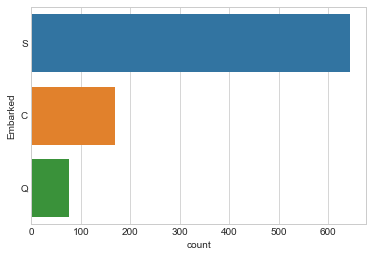

In [175]:
sns.countplot(y='Embarked', data=train)

In [176]:
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

    There are two missing values, what we do with them? We will remove them. 

In [220]:
df_con = df_con.dropna(subset=['Embarked'])
df_bin = df_bin.dropna(subset=['Embarked'])

In [221]:
len(df_con)

889

In [222]:
len(df_bin)

889

**Features ENCODING**

This will normalize our dataset to every value will be 1 or 0, disagregating the differents types for every column. 

In [180]:
one_hot_cols = df_bin.columns.tolist()
print(one_hot_cols)

['Survived', 'Pclass', 'Gender', 'SibSp', 'Parch', 'Fare', 'Embarked']


In [181]:
one_hot_cols.remove('Survived')

In [182]:
df_bin_enc = pd.get_dummies(df_bin, columns = one_hot_cols)

In [183]:
df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Gender_0,Gender_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [184]:
df_con.head()

,Survived,Pclass,Gender,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [185]:
#Label Encode all continuous values using LabelEncoder()

df_con_enc = df_con.apply(LabelEncoder().fit_transform)

In [186]:
df_con_enc.head()

,Survived,Pclass,Gender,SibSp,Parch,Fare,Embarked
0,0,2,1,1,0,18,2
1,1,0,0,1,0,207,0
2,1,2,0,0,0,41,2
3,1,0,0,1,0,189,2
4,0,2,1,0,0,43,2


LabelEncoding, transforms the values into numerical classes. Insted of transforming in 1 o 0, will tranforming into number that represents a class to avoid leading with floats or strings.

**STARTING WITH MACHINE LEARNING MODELS**



In [187]:
#Lets separate the data
selected_df = df_con_enc
selected_df.head()

,Survived,Pclass,Gender,SibSp,Parch,Fare,Embarked
0,0,2,1,1,0,18,2
1,1,0,0,1,0,207,0
2,1,2,0,0,0,41,2
3,1,0,0,1,0,189,2
4,0,2,1,0,0,43,2


In [188]:
#We will split the data frame to separate our target feature Survived(Y) from the rest of the features(X). Doing this we will capeble of train a model that use X to predict Y.
X_train = selected_df.drop('Survived', axis=1)
Y_train = selected_df.Survived

In [189]:
X_train.head()

,Pclass,Gender,SibSp,Parch,Fare,Embarked
0,2,1,1,0,18,2
1,0,0,1,0,207,0
2,2,0,0,0,41,2
3,0,0,1,0,189,2
4,2,1,0,0,43,2


In [190]:
Y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

**COMPARING MODELS**

We will compare the results of differents models. To do that we will use a function that let us see the performances of every model

In [191]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv): #algo is a function that represent a model, x_train are our training data, y_train are our labels, and cv is the number of time we want to cross validate the results
    
    #a lot of functions are imported from sklearn
    
    # One Pass
    model = algo.fit(X_train, y_train) #algo is a function from sklearn that represent a model
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, #model_selection is a function imported from sklearn
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv #returns the train_prediction, the accuracy and the cross validated accuracy. 

**LOGISTIC REGRESSION**

In [192]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 79.08
Accuracy CV 10-Fold: 78.52
Running Time: 0:00:00.044121


**K-NEAREST NEIGHBOURS**

In [193]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  Y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 81.44
Accuracy CV 10-Fold: 73.68
Running Time: 0:00:00.068512


**GAUSSIAN NAIVE BAYES**

In [194]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      Y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 76.72
Accuracy CV 10-Fold: 76.38
Running Time: 0:00:00.039219


**Linear Support Vector Machines (SVC)**

In [195]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                Y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 78.29
Accuracy CV 10-Fold: 64.0
Running Time: 0:00:00.138277


**STOCHASTIC GRADIENT DESCENT**

In [196]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  Y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 70.42
Accuracy CV 10-Fold: 63.55
Running Time: 0:00:00.051713


**DECISION TREE CLASSIFIER**

In [197]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                Y_train,
                                                                20)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 92.46
Accuracy CV 10-Fold: 79.87
Running Time: 0:00:00.076111


**GRADIENT BOOST TREES**

In [198]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       Y_train,
                                                                       20)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.39
Accuracy CV 10-Fold: 81.66
Running Time: 0:00:00.569376


**CatBOOST Algorithm**

In [199]:
X_train.head()

,Pclass,Gender,SibSp,Parch,Fare,Embarked
0,2,1,1,0,18,2
1,0,0,1,0,207,0
2,2,0,0,0,41,2
3,0,0,1,0,189,2
4,2,1,0,0,43,2


In [223]:
Y_train.head()
X_train = X_train.drop('SibSp', axis=1)
X_train = X_train.drop('Embarked', axis=1)

In [236]:
X_train.head()

,Pclass,Gender,Parch,Fare
0,2,1,0,18
1,0,0,0,207
2,2,0,0,41
3,0,0,0,189
4,2,1,0,43


In [225]:
cat_features = np.where(X_train.dtypes != np.float)[0]

In [226]:
cat_features

array([0, 1, 2, 3])

In [227]:
train_pool = Pool(X_train, Y_train, cat_features)

In [229]:
params = {'depth':[3,1,2,6,4,5,7,8,9,10],
          'iterations':[250,100,500,1000],
          'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
          'l2_leaf_reg':[3,1,5,10,100],
          'border_count':[32,5,10,20,50,100,200],
          'ctr_border_count':[50,5,10,20,100,200],
          'thread_count':4}

# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1500,
                                    learning_rate=0.03,
                                    depth=6,
                                    l2_leaf_reg=3,
                                    border_count=32,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, Y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6765631	total: 47.7ms	remaining: 1m 11s
1:	learn: 0.6608213	total: 93.9ms	remaining: 1m 10s
2:	learn: 0.6467041	total: 139ms	remaining: 1m 9s
3:	learn: 0.6340890	total: 177ms	remaining: 1m 6s
4:	learn: 0.6216003	total: 202ms	remaining: 1m
5:	learn: 0.6099280	total: 230ms	remaining: 57.2s
6:	learn: 0.5985244	total: 261ms	remaining: 55.7s
7:	learn: 0.5892430	total: 285ms	remaining: 53.1s
8:	learn: 0.5800813	total: 310ms	remaining: 51.3s
9:	learn: 0.5714096	total: 339ms	remaining: 50.5s
10:	learn: 0.5631710	total: 371ms	remaining: 50.2s
11:	learn: 0.5567875	total: 401ms	remaining: 49.8s
12:	learn: 0.5494015	total: 434ms	remaining: 49.6s
13:	learn: 0.5427154	total: 460ms	remaining: 48.8s
14:	learn: 0.5356138	total: 491ms	remaining: 48.6s
15:	learn: 0.5290660	total: 511ms	remaining: 47.4s
16:	learn: 0.5234704	total: 530ms	remaining: 46.2s
17:	learn: 0.5183141	total: 548ms	remaining: 45.1s
18:	learn: 0.5140698	total: 564ms	remaining: 44s
19:	learn: 0.5094218	total: 582ms	remainin

166:	learn: 0.3994520	total: 3.7s	remaining: 29.5s
167:	learn: 0.3994095	total: 3.73s	remaining: 29.6s
168:	learn: 0.3993657	total: 3.74s	remaining: 29.5s
169:	learn: 0.3992656	total: 3.76s	remaining: 29.4s
170:	learn: 0.3989117	total: 3.78s	remaining: 29.4s
171:	learn: 0.3988525	total: 3.8s	remaining: 29.3s
172:	learn: 0.3987654	total: 3.82s	remaining: 29.3s
173:	learn: 0.3983993	total: 3.84s	remaining: 29.3s
174:	learn: 0.3981411	total: 3.87s	remaining: 29.3s
175:	learn: 0.3981106	total: 3.88s	remaining: 29.2s
176:	learn: 0.3981055	total: 3.9s	remaining: 29.1s
177:	learn: 0.3975860	total: 3.92s	remaining: 29.1s
178:	learn: 0.3975713	total: 3.95s	remaining: 29.1s
179:	learn: 0.3974427	total: 3.96s	remaining: 29.1s
180:	learn: 0.3974425	total: 3.98s	remaining: 29s
181:	learn: 0.3972379	total: 4.01s	remaining: 29s
182:	learn: 0.3972287	total: 4.02s	remaining: 29s
183:	learn: 0.3969875	total: 4.04s	remaining: 28.9s
184:	learn: 0.3965081	total: 4.06s	remaining: 28.9s
185:	learn: 0.3964664

333:	learn: 0.3718389	total: 7.11s	remaining: 24.8s
334:	learn: 0.3715833	total: 7.14s	remaining: 24.8s
335:	learn: 0.3714584	total: 7.16s	remaining: 24.8s
336:	learn: 0.3708537	total: 7.18s	remaining: 24.8s
337:	learn: 0.3707502	total: 7.19s	remaining: 24.7s
338:	learn: 0.3703170	total: 7.21s	remaining: 24.7s
339:	learn: 0.3700193	total: 7.23s	remaining: 24.7s
340:	learn: 0.3695346	total: 7.25s	remaining: 24.6s
341:	learn: 0.3694036	total: 7.27s	remaining: 24.6s
342:	learn: 0.3693119	total: 7.29s	remaining: 24.6s
343:	learn: 0.3689666	total: 7.31s	remaining: 24.6s
344:	learn: 0.3688379	total: 7.33s	remaining: 24.6s
345:	learn: 0.3687698	total: 7.35s	remaining: 24.5s
346:	learn: 0.3686578	total: 7.37s	remaining: 24.5s
347:	learn: 0.3685424	total: 7.4s	remaining: 24.5s
348:	learn: 0.3684858	total: 7.43s	remaining: 24.5s
349:	learn: 0.3683420	total: 7.46s	remaining: 24.5s
350:	learn: 0.3682733	total: 7.48s	remaining: 24.5s
351:	learn: 0.3681085	total: 7.5s	remaining: 24.5s
352:	learn: 0.

493:	learn: 0.3451983	total: 10.5s	remaining: 21.4s
494:	learn: 0.3451580	total: 10.5s	remaining: 21.4s
495:	learn: 0.3449600	total: 10.5s	remaining: 21.3s
496:	learn: 0.3448860	total: 10.6s	remaining: 21.3s
497:	learn: 0.3448340	total: 10.6s	remaining: 21.3s
498:	learn: 0.3444616	total: 10.6s	remaining: 21.3s
499:	learn: 0.3443310	total: 10.6s	remaining: 21.2s
500:	learn: 0.3442988	total: 10.6s	remaining: 21.2s
501:	learn: 0.3441296	total: 10.7s	remaining: 21.2s
502:	learn: 0.3440468	total: 10.7s	remaining: 21.1s
503:	learn: 0.3440073	total: 10.7s	remaining: 21.1s
504:	learn: 0.3439000	total: 10.7s	remaining: 21.1s
505:	learn: 0.3437967	total: 10.7s	remaining: 21.1s
506:	learn: 0.3435514	total: 10.8s	remaining: 21.1s
507:	learn: 0.3434788	total: 10.8s	remaining: 21s
508:	learn: 0.3434442	total: 10.8s	remaining: 21s
509:	learn: 0.3433300	total: 10.8s	remaining: 21s
510:	learn: 0.3430226	total: 10.8s	remaining: 21s
511:	learn: 0.3429976	total: 10.8s	remaining: 20.9s
512:	learn: 0.342885

660:	learn: 0.3281961	total: 13.9s	remaining: 17.7s
661:	learn: 0.3281733	total: 14s	remaining: 17.7s
662:	learn: 0.3279860	total: 14s	remaining: 17.6s
663:	learn: 0.3278616	total: 14s	remaining: 17.6s
664:	learn: 0.3277948	total: 14s	remaining: 17.6s
665:	learn: 0.3277808	total: 14s	remaining: 17.6s
666:	learn: 0.3277050	total: 14.1s	remaining: 17.6s
667:	learn: 0.3276662	total: 14.1s	remaining: 17.5s
668:	learn: 0.3276109	total: 14.1s	remaining: 17.5s
669:	learn: 0.3275342	total: 14.1s	remaining: 17.5s
670:	learn: 0.3275236	total: 14.1s	remaining: 17.5s
671:	learn: 0.3273671	total: 14.2s	remaining: 17.5s
672:	learn: 0.3273515	total: 14.2s	remaining: 17.4s
673:	learn: 0.3272560	total: 14.2s	remaining: 17.4s
674:	learn: 0.3272176	total: 14.2s	remaining: 17.4s
675:	learn: 0.3271824	total: 14.2s	remaining: 17.4s
676:	learn: 0.3269592	total: 14.3s	remaining: 17.3s
677:	learn: 0.3269216	total: 14.3s	remaining: 17.3s
678:	learn: 0.3267312	total: 14.3s	remaining: 17.3s
679:	learn: 0.3266955	

820:	learn: 0.3155436	total: 17.3s	remaining: 14.3s
821:	learn: 0.3155079	total: 17.3s	remaining: 14.3s
822:	learn: 0.3155006	total: 17.4s	remaining: 14.3s
823:	learn: 0.3154935	total: 17.4s	remaining: 14.3s
824:	learn: 0.3154638	total: 17.4s	remaining: 14.2s
825:	learn: 0.3154259	total: 17.4s	remaining: 14.2s
826:	learn: 0.3153903	total: 17.4s	remaining: 14.2s
827:	learn: 0.3153853	total: 17.5s	remaining: 14.2s
828:	learn: 0.3153403	total: 17.5s	remaining: 14.1s
829:	learn: 0.3153040	total: 17.5s	remaining: 14.1s
830:	learn: 0.3151840	total: 17.5s	remaining: 14.1s
831:	learn: 0.3151465	total: 17.5s	remaining: 14.1s
832:	learn: 0.3150530	total: 17.6s	remaining: 14.1s
833:	learn: 0.3149483	total: 17.6s	remaining: 14s
834:	learn: 0.3149382	total: 17.6s	remaining: 14s
835:	learn: 0.3148586	total: 17.6s	remaining: 14s
836:	learn: 0.3148507	total: 17.7s	remaining: 14s
837:	learn: 0.3147975	total: 17.7s	remaining: 14s
838:	learn: 0.3147165	total: 17.7s	remaining: 13.9s
839:	learn: 0.3146712	

985:	learn: 0.3054390	total: 20.7s	remaining: 10.8s
986:	learn: 0.3051931	total: 20.7s	remaining: 10.8s
987:	learn: 0.3051078	total: 20.7s	remaining: 10.7s
988:	learn: 0.3051006	total: 20.7s	remaining: 10.7s
989:	learn: 0.3050108	total: 20.7s	remaining: 10.7s
990:	learn: 0.3049947	total: 20.8s	remaining: 10.7s
991:	learn: 0.3047366	total: 20.8s	remaining: 10.6s
992:	learn: 0.3045277	total: 20.8s	remaining: 10.6s
993:	learn: 0.3045232	total: 20.8s	remaining: 10.6s
994:	learn: 0.3044955	total: 20.8s	remaining: 10.6s
995:	learn: 0.3044885	total: 20.9s	remaining: 10.6s
996:	learn: 0.3043053	total: 20.9s	remaining: 10.5s
997:	learn: 0.3042671	total: 20.9s	remaining: 10.5s
998:	learn: 0.3042586	total: 20.9s	remaining: 10.5s
999:	learn: 0.3041575	total: 20.9s	remaining: 10.5s
1000:	learn: 0.3041437	total: 21s	remaining: 10.4s
1001:	learn: 0.3041252	total: 21s	remaining: 10.4s
1002:	learn: 0.3041061	total: 21s	remaining: 10.4s
1003:	learn: 0.3040670	total: 21s	remaining: 10.4s
1004:	learn: 0.3

1149:	learn: 0.2937978	total: 24.3s	remaining: 7.4s
1150:	learn: 0.2937578	total: 24.4s	remaining: 7.38s
1151:	learn: 0.2937330	total: 24.4s	remaining: 7.36s
1152:	learn: 0.2937185	total: 24.4s	remaining: 7.34s
1153:	learn: 0.2936709	total: 24.4s	remaining: 7.32s
1154:	learn: 0.2936624	total: 24.4s	remaining: 7.29s
1155:	learn: 0.2935940	total: 24.4s	remaining: 7.27s
1156:	learn: 0.2935296	total: 24.5s	remaining: 7.25s
1157:	learn: 0.2935196	total: 24.5s	remaining: 7.23s
1158:	learn: 0.2935056	total: 24.5s	remaining: 7.21s
1159:	learn: 0.2934485	total: 24.5s	remaining: 7.18s
1160:	learn: 0.2934408	total: 24.5s	remaining: 7.16s
1161:	learn: 0.2934396	total: 24.6s	remaining: 7.14s
1162:	learn: 0.2934386	total: 24.6s	remaining: 7.12s
1163:	learn: 0.2933697	total: 24.6s	remaining: 7.1s
1164:	learn: 0.2931677	total: 24.6s	remaining: 7.08s
1165:	learn: 0.2931390	total: 24.6s	remaining: 7.05s
1166:	learn: 0.2929424	total: 24.6s	remaining: 7.03s
1167:	learn: 0.2929261	total: 24.7s	remaining: 7

1305:	learn: 0.2857113	total: 27.5s	remaining: 4.08s
1306:	learn: 0.2856990	total: 27.5s	remaining: 4.06s
1307:	learn: 0.2856706	total: 27.5s	remaining: 4.04s
1308:	learn: 0.2855510	total: 27.6s	remaining: 4.02s
1309:	learn: 0.2855500	total: 27.6s	remaining: 4s
1310:	learn: 0.2855341	total: 27.6s	remaining: 3.98s
1311:	learn: 0.2855301	total: 27.6s	remaining: 3.96s
1312:	learn: 0.2854572	total: 27.6s	remaining: 3.94s
1313:	learn: 0.2852954	total: 27.6s	remaining: 3.91s
1314:	learn: 0.2852871	total: 27.7s	remaining: 3.89s
1315:	learn: 0.2852463	total: 27.7s	remaining: 3.87s
1316:	learn: 0.2851867	total: 27.7s	remaining: 3.85s
1317:	learn: 0.2849921	total: 27.7s	remaining: 3.83s
1318:	learn: 0.2849862	total: 27.7s	remaining: 3.81s
1319:	learn: 0.2849603	total: 27.8s	remaining: 3.79s
1320:	learn: 0.2849487	total: 27.8s	remaining: 3.76s
1321:	learn: 0.2849280	total: 27.8s	remaining: 3.74s
1322:	learn: 0.2849077	total: 27.8s	remaining: 3.72s
1323:	learn: 0.2848085	total: 27.9s	remaining: 3.

1469:	learn: 0.2785015	total: 31s	remaining: 632ms
1470:	learn: 0.2784687	total: 31s	remaining: 611ms
1471:	learn: 0.2784671	total: 31s	remaining: 590ms
1472:	learn: 0.2784639	total: 31s	remaining: 569ms
1473:	learn: 0.2784367	total: 31.1s	remaining: 548ms
1474:	learn: 0.2783667	total: 31.1s	remaining: 527ms
1475:	learn: 0.2783624	total: 31.1s	remaining: 505ms
1476:	learn: 0.2783175	total: 31.1s	remaining: 484ms
1477:	learn: 0.2783171	total: 31.1s	remaining: 463ms
1478:	learn: 0.2783163	total: 31.1s	remaining: 442ms
1479:	learn: 0.2783126	total: 31.2s	remaining: 421ms
1480:	learn: 0.2781591	total: 31.2s	remaining: 400ms
1481:	learn: 0.2780957	total: 31.2s	remaining: 379ms
1482:	learn: 0.2780667	total: 31.2s	remaining: 358ms
1483:	learn: 0.2780642	total: 31.2s	remaining: 337ms
1484:	learn: 0.2780591	total: 31.3s	remaining: 316ms
1485:	learn: 0.2779889	total: 31.3s	remaining: 295ms
1486:	learn: 0.2779774	total: 31.3s	remaining: 274ms
1487:	learn: 0.2779698	total: 31.3s	remaining: 253ms
1

In [230]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6757853	test: 0.6758366	best: 0.6758366 (0)	total: 435ms	remaining: 10m 52s
1:	learn: 0.6597533	test: 0.6601944	best: 0.6601944 (1)	total: 683ms	remaining: 8m 31s
2:	learn: 0.6450738	test: 0.6458221	best: 0.6458221 (2)	total: 1s	remaining: 8m 19s
3:	learn: 0.6325749	test: 0.6334261	best: 0.6334261 (3)	total: 1.39s	remaining: 8m 39s
4:	learn: 0.6201970	test: 0.6210278	best: 0.6210278 (4)	total: 1.69s	remaining: 8m 24s
5:	learn: 0.6083284	test: 0.6093386	best: 0.6093386 (5)	total: 1.94s	remaining: 8m 3s
6:	learn: 0.5972431	test: 0.5982167	best: 0.5982167 (6)	total: 2.25s	remaining: 7m 59s
7:	learn: 0.5868713	test: 0.5881568	best: 0.5881568 (7)	total: 2.52s	remaining: 7m 50s
8:	learn: 0.5771700	test: 0.5786214	best: 0.5786214 (8)	total: 2.86s	remaining: 7m 54s
9:	learn: 0.5689397	test: 0.5705043	best: 0.5705043 (9)	total: 3.14s	remaining: 7m 48s
10:	learn: 0.5612742	test: 0.5632277	best: 0.5632277 (10)	total: 3.33s	remaining: 7m 31s
11:	learn: 0.5538102	test: 0.5558793	best: 0

93:	learn: 0.4161219	test: 0.4316452	best: 0.4316452 (93)	total: 23.4s	remaining: 5m 50s
94:	learn: 0.4159038	test: 0.4312974	best: 0.4312974 (94)	total: 23.6s	remaining: 5m 49s
95:	learn: 0.4154715	test: 0.4311165	best: 0.4311165 (95)	total: 23.9s	remaining: 5m 49s
96:	learn: 0.4151615	test: 0.4308900	best: 0.4308900 (96)	total: 24.1s	remaining: 5m 48s
97:	learn: 0.4145549	test: 0.4305341	best: 0.4305341 (97)	total: 24.4s	remaining: 5m 48s
98:	learn: 0.4142410	test: 0.4303085	best: 0.4303085 (98)	total: 24.6s	remaining: 5m 48s
99:	learn: 0.4140011	test: 0.4302252	best: 0.4302252 (99)	total: 24.8s	remaining: 5m 47s
100:	learn: 0.4136184	test: 0.4302627	best: 0.4302252 (99)	total: 25s	remaining: 5m 46s
101:	learn: 0.4132848	test: 0.4300677	best: 0.4300677 (101)	total: 25.4s	remaining: 5m 48s
102:	learn: 0.4129978	test: 0.4299178	best: 0.4299178 (102)	total: 25.6s	remaining: 5m 47s
103:	learn: 0.4127015	test: 0.4297958	best: 0.4297958 (103)	total: 25.8s	remaining: 5m 46s
104:	learn: 0.41

184:	learn: 0.3989534	test: 0.4244477	best: 0.4244477 (184)	total: 43.9s	remaining: 5m 11s
185:	learn: 0.3987663	test: 0.4244426	best: 0.4244426 (185)	total: 44.1s	remaining: 5m 11s
186:	learn: 0.3986722	test: 0.4244673	best: 0.4244426 (185)	total: 44.3s	remaining: 5m 10s
187:	learn: 0.3985830	test: 0.4244398	best: 0.4244398 (187)	total: 44.4s	remaining: 5m 10s
188:	learn: 0.3984704	test: 0.4243714	best: 0.4243714 (188)	total: 44.7s	remaining: 5m 10s
189:	learn: 0.3984093	test: 0.4243884	best: 0.4243714 (188)	total: 44.9s	remaining: 5m 9s
190:	learn: 0.3982120	test: 0.4242558	best: 0.4242558 (190)	total: 45.1s	remaining: 5m 9s
191:	learn: 0.3980629	test: 0.4241203	best: 0.4241203 (191)	total: 45.3s	remaining: 5m 8s
192:	learn: 0.3978908	test: 0.4240727	best: 0.4240727 (192)	total: 45.7s	remaining: 5m 9s
193:	learn: 0.3976838	test: 0.4238790	best: 0.4238790 (193)	total: 45.9s	remaining: 5m 9s
194:	learn: 0.3974502	test: 0.4236776	best: 0.4236776 (194)	total: 46.1s	remaining: 5m 8s
195:	

275:	learn: 0.3861528	test: 0.4231852	best: 0.4226883 (235)	total: 1m 4s	remaining: 4m 47s
276:	learn: 0.3859327	test: 0.4231391	best: 0.4226883 (235)	total: 1m 5s	remaining: 4m 47s
277:	learn: 0.3857284	test: 0.4230890	best: 0.4226883 (235)	total: 1m 5s	remaining: 4m 47s
278:	learn: 0.3855098	test: 0.4230862	best: 0.4226883 (235)	total: 1m 5s	remaining: 4m 46s
279:	learn: 0.3853239	test: 0.4230561	best: 0.4226883 (235)	total: 1m 5s	remaining: 4m 46s
280:	learn: 0.3850904	test: 0.4231191	best: 0.4226883 (235)	total: 1m 6s	remaining: 4m 46s
281:	learn: 0.3849049	test: 0.4231765	best: 0.4226883 (235)	total: 1m 6s	remaining: 4m 46s
282:	learn: 0.3847675	test: 0.4230773	best: 0.4226883 (235)	total: 1m 6s	remaining: 4m 46s
283:	learn: 0.3845391	test: 0.4229650	best: 0.4226883 (235)	total: 1m 6s	remaining: 4m 46s
284:	learn: 0.3841305	test: 0.4228046	best: 0.4226883 (235)	total: 1m 7s	remaining: 4m 45s
285:	learn: 0.3838843	test: 0.4227754	best: 0.4226883 (235)	total: 1m 7s	remaining: 4m 45s

365:	learn: 0.3692975	test: 0.4254263	best: 0.4226883 (235)	total: 1m 27s	remaining: 4m 32s
366:	learn: 0.3689730	test: 0.4253723	best: 0.4226883 (235)	total: 1m 28s	remaining: 4m 32s
367:	learn: 0.3688765	test: 0.4254145	best: 0.4226883 (235)	total: 1m 28s	remaining: 4m 31s
368:	learn: 0.3687529	test: 0.4252892	best: 0.4226883 (235)	total: 1m 28s	remaining: 4m 31s
369:	learn: 0.3685072	test: 0.4253930	best: 0.4226883 (235)	total: 1m 28s	remaining: 4m 31s
370:	learn: 0.3684272	test: 0.4254306	best: 0.4226883 (235)	total: 1m 29s	remaining: 4m 31s
371:	learn: 0.3682679	test: 0.4256125	best: 0.4226883 (235)	total: 1m 29s	remaining: 4m 30s
372:	learn: 0.3680833	test: 0.4255713	best: 0.4226883 (235)	total: 1m 29s	remaining: 4m 30s
373:	learn: 0.3679890	test: 0.4255107	best: 0.4226883 (235)	total: 1m 29s	remaining: 4m 30s
374:	learn: 0.3678992	test: 0.4254736	best: 0.4226883 (235)	total: 1m 30s	remaining: 4m 30s
375:	learn: 0.3678202	test: 0.4255271	best: 0.4226883 (235)	total: 1m 30s	remain

455:	learn: 0.3561952	test: 0.4280487	best: 0.4226883 (235)	total: 1m 53s	remaining: 4m 19s
456:	learn: 0.3560769	test: 0.4280361	best: 0.4226883 (235)	total: 1m 53s	remaining: 4m 19s
457:	learn: 0.3559226	test: 0.4280566	best: 0.4226883 (235)	total: 1m 53s	remaining: 4m 19s
458:	learn: 0.3558131	test: 0.4280917	best: 0.4226883 (235)	total: 1m 54s	remaining: 4m 19s
459:	learn: 0.3557200	test: 0.4281345	best: 0.4226883 (235)	total: 1m 54s	remaining: 4m 19s
460:	learn: 0.3554638	test: 0.4279909	best: 0.4226883 (235)	total: 1m 54s	remaining: 4m 18s
461:	learn: 0.3553290	test: 0.4279859	best: 0.4226883 (235)	total: 1m 55s	remaining: 4m 18s
462:	learn: 0.3552240	test: 0.4280299	best: 0.4226883 (235)	total: 1m 55s	remaining: 4m 18s
463:	learn: 0.3551076	test: 0.4281134	best: 0.4226883 (235)	total: 1m 55s	remaining: 4m 18s
464:	learn: 0.3550068	test: 0.4281315	best: 0.4226883 (235)	total: 1m 55s	remaining: 4m 17s
465:	learn: 0.3549034	test: 0.4282352	best: 0.4226883 (235)	total: 1m 56s	remain

545:	learn: 0.3453236	test: 0.4303981	best: 0.4226883 (235)	total: 2m 19s	remaining: 4m 3s
546:	learn: 0.3452429	test: 0.4304265	best: 0.4226883 (235)	total: 2m 19s	remaining: 4m 3s
547:	learn: 0.3451609	test: 0.4304932	best: 0.4226883 (235)	total: 2m 19s	remaining: 4m 3s
548:	learn: 0.3450752	test: 0.4304615	best: 0.4226883 (235)	total: 2m 20s	remaining: 4m 2s
549:	learn: 0.3450140	test: 0.4304575	best: 0.4226883 (235)	total: 2m 20s	remaining: 4m 2s
550:	learn: 0.3449370	test: 0.4304553	best: 0.4226883 (235)	total: 2m 20s	remaining: 4m 2s
551:	learn: 0.3448333	test: 0.4304437	best: 0.4226883 (235)	total: 2m 21s	remaining: 4m 2s
552:	learn: 0.3447148	test: 0.4305285	best: 0.4226883 (235)	total: 2m 21s	remaining: 4m 1s
553:	learn: 0.3445798	test: 0.4306212	best: 0.4226883 (235)	total: 2m 21s	remaining: 4m 1s
554:	learn: 0.3444107	test: 0.4308162	best: 0.4226883 (235)	total: 2m 21s	remaining: 4m 1s
555:	learn: 0.3442209	test: 0.4308275	best: 0.4226883 (235)	total: 2m 22s	remaining: 4m 1s

635:	learn: 0.3353837	test: 0.4344758	best: 0.4226883 (235)	total: 2m 44s	remaining: 3m 43s
636:	learn: 0.3352925	test: 0.4344757	best: 0.4226883 (235)	total: 2m 45s	remaining: 3m 43s
637:	learn: 0.3352279	test: 0.4344123	best: 0.4226883 (235)	total: 2m 45s	remaining: 3m 43s
638:	learn: 0.3351466	test: 0.4345328	best: 0.4226883 (235)	total: 2m 45s	remaining: 3m 43s
639:	learn: 0.3350857	test: 0.4345677	best: 0.4226883 (235)	total: 2m 45s	remaining: 3m 42s
640:	learn: 0.3349320	test: 0.4346242	best: 0.4226883 (235)	total: 2m 46s	remaining: 3m 42s
641:	learn: 0.3348117	test: 0.4347229	best: 0.4226883 (235)	total: 2m 46s	remaining: 3m 42s
642:	learn: 0.3346958	test: 0.4347471	best: 0.4226883 (235)	total: 2m 46s	remaining: 3m 42s
643:	learn: 0.3346205	test: 0.4348681	best: 0.4226883 (235)	total: 2m 47s	remaining: 3m 42s
644:	learn: 0.3344949	test: 0.4348807	best: 0.4226883 (235)	total: 2m 47s	remaining: 3m 42s
645:	learn: 0.3343725	test: 0.4348870	best: 0.4226883 (235)	total: 2m 47s	remain

725:	learn: 0.3271794	test: 0.4380675	best: 0.4226883 (235)	total: 3m 11s	remaining: 3m 24s
726:	learn: 0.3270687	test: 0.4381949	best: 0.4226883 (235)	total: 3m 11s	remaining: 3m 23s
727:	learn: 0.3269392	test: 0.4383210	best: 0.4226883 (235)	total: 3m 12s	remaining: 3m 23s
728:	learn: 0.3268097	test: 0.4382569	best: 0.4226883 (235)	total: 3m 12s	remaining: 3m 23s
729:	learn: 0.3267478	test: 0.4384041	best: 0.4226883 (235)	total: 3m 12s	remaining: 3m 23s
730:	learn: 0.3266961	test: 0.4384446	best: 0.4226883 (235)	total: 3m 13s	remaining: 3m 23s
731:	learn: 0.3266023	test: 0.4384932	best: 0.4226883 (235)	total: 3m 13s	remaining: 3m 23s
732:	learn: 0.3265338	test: 0.4385662	best: 0.4226883 (235)	total: 3m 14s	remaining: 3m 23s
733:	learn: 0.3264439	test: 0.4387663	best: 0.4226883 (235)	total: 3m 14s	remaining: 3m 23s
734:	learn: 0.3263822	test: 0.4389131	best: 0.4226883 (235)	total: 3m 14s	remaining: 3m 22s
735:	learn: 0.3263033	test: 0.4389327	best: 0.4226883 (235)	total: 3m 14s	remain

815:	learn: 0.3197730	test: 0.4411166	best: 0.4226883 (235)	total: 3m 39s	remaining: 3m 3s
816:	learn: 0.3196682	test: 0.4412996	best: 0.4226883 (235)	total: 3m 39s	remaining: 3m 3s
817:	learn: 0.3195398	test: 0.4413506	best: 0.4226883 (235)	total: 3m 40s	remaining: 3m 3s
818:	learn: 0.3194584	test: 0.4413159	best: 0.4226883 (235)	total: 3m 40s	remaining: 3m 3s
819:	learn: 0.3193550	test: 0.4413518	best: 0.4226883 (235)	total: 3m 40s	remaining: 3m 2s
820:	learn: 0.3192732	test: 0.4414553	best: 0.4226883 (235)	total: 3m 40s	remaining: 3m 2s
821:	learn: 0.3192197	test: 0.4414021	best: 0.4226883 (235)	total: 3m 41s	remaining: 3m 2s
822:	learn: 0.3191308	test: 0.4415084	best: 0.4226883 (235)	total: 3m 41s	remaining: 3m 2s
823:	learn: 0.3190340	test: 0.4415269	best: 0.4226883 (235)	total: 3m 41s	remaining: 3m 1s
824:	learn: 0.3189572	test: 0.4416475	best: 0.4226883 (235)	total: 3m 41s	remaining: 3m 1s
825:	learn: 0.3189211	test: 0.4416450	best: 0.4226883 (235)	total: 3m 42s	remaining: 3m 1s

905:	learn: 0.3131490	test: 0.4447519	best: 0.4226883 (235)	total: 4m 9s	remaining: 2m 43s
906:	learn: 0.3131116	test: 0.4448156	best: 0.4226883 (235)	total: 4m 9s	remaining: 2m 43s
907:	learn: 0.3130407	test: 0.4448390	best: 0.4226883 (235)	total: 4m 9s	remaining: 2m 42s
908:	learn: 0.3129803	test: 0.4448527	best: 0.4226883 (235)	total: 4m 10s	remaining: 2m 42s
909:	learn: 0.3129216	test: 0.4448607	best: 0.4226883 (235)	total: 4m 10s	remaining: 2m 42s
910:	learn: 0.3128267	test: 0.4449248	best: 0.4226883 (235)	total: 4m 11s	remaining: 2m 42s
911:	learn: 0.3127328	test: 0.4449787	best: 0.4226883 (235)	total: 4m 11s	remaining: 2m 42s
912:	learn: 0.3126849	test: 0.4449888	best: 0.4226883 (235)	total: 4m 11s	remaining: 2m 41s
913:	learn: 0.3126188	test: 0.4450225	best: 0.4226883 (235)	total: 4m 12s	remaining: 2m 41s
914:	learn: 0.3125582	test: 0.4450915	best: 0.4226883 (235)	total: 4m 12s	remaining: 2m 41s
915:	learn: 0.3125235	test: 0.4450649	best: 0.4226883 (235)	total: 4m 12s	remaining

995:	learn: 0.3073706	test: 0.4477527	best: 0.4226883 (235)	total: 4m 42s	remaining: 2m 23s
996:	learn: 0.3073310	test: 0.4478337	best: 0.4226883 (235)	total: 4m 42s	remaining: 2m 22s
997:	learn: 0.3072694	test: 0.4478194	best: 0.4226883 (235)	total: 4m 43s	remaining: 2m 22s
998:	learn: 0.3071930	test: 0.4479419	best: 0.4226883 (235)	total: 4m 43s	remaining: 2m 22s
999:	learn: 0.3070793	test: 0.4481036	best: 0.4226883 (235)	total: 4m 43s	remaining: 2m 21s
1000:	learn: 0.3070444	test: 0.4481728	best: 0.4226883 (235)	total: 4m 44s	remaining: 2m 21s
1001:	learn: 0.3069550	test: 0.4482220	best: 0.4226883 (235)	total: 4m 44s	remaining: 2m 21s
1002:	learn: 0.3069056	test: 0.4482509	best: 0.4226883 (235)	total: 4m 45s	remaining: 2m 21s
1003:	learn: 0.3068429	test: 0.4482719	best: 0.4226883 (235)	total: 4m 45s	remaining: 2m 21s
1004:	learn: 0.3067655	test: 0.4482833	best: 0.4226883 (235)	total: 4m 45s	remaining: 2m 20s
1005:	learn: 0.3067090	test: 0.4485479	best: 0.4226883 (235)	total: 4m 46s	

1084:	learn: 0.3021126	test: 0.4506763	best: 0.4226883 (235)	total: 5m 16s	remaining: 2m 1s
1085:	learn: 0.3020685	test: 0.4506630	best: 0.4226883 (235)	total: 5m 17s	remaining: 2m
1086:	learn: 0.3019843	test: 0.4506257	best: 0.4226883 (235)	total: 5m 17s	remaining: 2m
1087:	learn: 0.3019452	test: 0.4506190	best: 0.4226883 (235)	total: 5m 18s	remaining: 2m
1088:	learn: 0.3019064	test: 0.4506511	best: 0.4226883 (235)	total: 5m 18s	remaining: 2m
1089:	learn: 0.3018228	test: 0.4506736	best: 0.4226883 (235)	total: 5m 18s	remaining: 1m 59s
1090:	learn: 0.3017688	test: 0.4507167	best: 0.4226883 (235)	total: 5m 19s	remaining: 1m 59s
1091:	learn: 0.3017117	test: 0.4506407	best: 0.4226883 (235)	total: 5m 19s	remaining: 1m 59s
1092:	learn: 0.3016558	test: 0.4506263	best: 0.4226883 (235)	total: 5m 19s	remaining: 1m 59s
1093:	learn: 0.3016102	test: 0.4506739	best: 0.4226883 (235)	total: 5m 19s	remaining: 1m 58s
1094:	learn: 0.3015784	test: 0.4506965	best: 0.4226883 (235)	total: 5m 20s	remaining: 1

1173:	learn: 0.2972807	test: 0.4532030	best: 0.4226883 (235)	total: 5m 47s	remaining: 1m 36s
1174:	learn: 0.2972653	test: 0.4531802	best: 0.4226883 (235)	total: 5m 47s	remaining: 1m 36s
1175:	learn: 0.2972212	test: 0.4532008	best: 0.4226883 (235)	total: 5m 48s	remaining: 1m 35s
1176:	learn: 0.2971582	test: 0.4532740	best: 0.4226883 (235)	total: 5m 48s	remaining: 1m 35s
1177:	learn: 0.2970788	test: 0.4532946	best: 0.4226883 (235)	total: 5m 48s	remaining: 1m 35s
1178:	learn: 0.2970519	test: 0.4534453	best: 0.4226883 (235)	total: 5m 49s	remaining: 1m 35s
1179:	learn: 0.2969545	test: 0.4532661	best: 0.4226883 (235)	total: 5m 49s	remaining: 1m 34s
1180:	learn: 0.2969191	test: 0.4532633	best: 0.4226883 (235)	total: 5m 49s	remaining: 1m 34s
1181:	learn: 0.2968680	test: 0.4533016	best: 0.4226883 (235)	total: 5m 50s	remaining: 1m 34s
1182:	learn: 0.2968210	test: 0.4533647	best: 0.4226883 (235)	total: 5m 50s	remaining: 1m 33s
1183:	learn: 0.2967588	test: 0.4533811	best: 0.4226883 (235)	total: 5m

1262:	learn: 0.2925648	test: 0.4546029	best: 0.4226883 (235)	total: 6m 17s	remaining: 1m 10s
1263:	learn: 0.2924842	test: 0.4546238	best: 0.4226883 (235)	total: 6m 18s	remaining: 1m 10s
1264:	learn: 0.2923720	test: 0.4546847	best: 0.4226883 (235)	total: 6m 18s	remaining: 1m 10s
1265:	learn: 0.2922840	test: 0.4546852	best: 0.4226883 (235)	total: 6m 18s	remaining: 1m 10s
1266:	learn: 0.2921890	test: 0.4546383	best: 0.4226883 (235)	total: 6m 19s	remaining: 1m 9s
1267:	learn: 0.2921545	test: 0.4547043	best: 0.4226883 (235)	total: 6m 19s	remaining: 1m 9s
1268:	learn: 0.2921067	test: 0.4547520	best: 0.4226883 (235)	total: 6m 19s	remaining: 1m 9s
1269:	learn: 0.2920807	test: 0.4547445	best: 0.4226883 (235)	total: 6m 20s	remaining: 1m 8s
1270:	learn: 0.2920230	test: 0.4547540	best: 0.4226883 (235)	total: 6m 20s	remaining: 1m 8s
1271:	learn: 0.2919543	test: 0.4548143	best: 0.4226883 (235)	total: 6m 20s	remaining: 1m 8s
1272:	learn: 0.2919221	test: 0.4548737	best: 0.4226883 (235)	total: 6m 21s	r

1352:	learn: 0.2883403	test: 0.4571674	best: 0.4226883 (235)	total: 6m 49s	remaining: 44.5s
1353:	learn: 0.2882952	test: 0.4572011	best: 0.4226883 (235)	total: 6m 50s	remaining: 44.2s
1354:	learn: 0.2882650	test: 0.4572741	best: 0.4226883 (235)	total: 6m 50s	remaining: 44s
1355:	learn: 0.2882201	test: 0.4573360	best: 0.4226883 (235)	total: 6m 51s	remaining: 43.6s
1356:	learn: 0.2881799	test: 0.4573591	best: 0.4226883 (235)	total: 6m 51s	remaining: 43.3s
1357:	learn: 0.2881217	test: 0.4575405	best: 0.4226883 (235)	total: 6m 52s	remaining: 43.1s
1358:	learn: 0.2880647	test: 0.4575839	best: 0.4226883 (235)	total: 6m 52s	remaining: 42.8s
1359:	learn: 0.2880117	test: 0.4575585	best: 0.4226883 (235)	total: 6m 52s	remaining: 42.5s
1360:	learn: 0.2879755	test: 0.4575623	best: 0.4226883 (235)	total: 6m 52s	remaining: 42.2s
1361:	learn: 0.2879594	test: 0.4576006	best: 0.4226883 (235)	total: 6m 53s	remaining: 41.9s
1362:	learn: 0.2878967	test: 0.4576925	best: 0.4226883 (235)	total: 6m 53s	remaini

1442:	learn: 0.2843393	test: 0.4595791	best: 0.4226883 (235)	total: 7m 23s	remaining: 17.5s
1443:	learn: 0.2842845	test: 0.4596274	best: 0.4226883 (235)	total: 7m 24s	remaining: 17.2s
1444:	learn: 0.2842336	test: 0.4596798	best: 0.4226883 (235)	total: 7m 24s	remaining: 16.9s
1445:	learn: 0.2842200	test: 0.4596706	best: 0.4226883 (235)	total: 7m 25s	remaining: 16.6s
1446:	learn: 0.2841705	test: 0.4596382	best: 0.4226883 (235)	total: 7m 25s	remaining: 16.3s
1447:	learn: 0.2841545	test: 0.4596838	best: 0.4226883 (235)	total: 7m 25s	remaining: 16s
1448:	learn: 0.2840749	test: 0.4596844	best: 0.4226883 (235)	total: 7m 26s	remaining: 15.7s
1449:	learn: 0.2840439	test: 0.4596912	best: 0.4226883 (235)	total: 7m 26s	remaining: 15.4s
1450:	learn: 0.2839928	test: 0.4596524	best: 0.4226883 (235)	total: 7m 26s	remaining: 15.1s
1451:	learn: 0.2839342	test: 0.4596834	best: 0.4226883 (235)	total: 7m 27s	remaining: 14.8s
1452:	learn: 0.2838966	test: 0.4596578	best: 0.4226883 (235)	total: 7m 27s	remaini

**MODEL RESULTS COMPARITIONS**

Its important to compare both accuracy and cross validation accuracy scores between all the model that we try.


Cross Validation Accuracy is a more confident metric to evaluate models


In [232]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,92.46
6,Gradient Boosting Trees,86.39
7,CatBoost,85.83
0,KNN,81.44
1,Logistic Regression,79.08
4,Linear SVC,78.29
2,Naive Bayes,76.72
3,Stochastic Gradient Decent,70.42


In [234]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
7,CatBoost,81.89
6,Gradient Boosting Trees,81.66
5,Decision Tree,79.87
1,Logistic Regression,78.52
2,Naive Bayes,76.38
0,KNN,73.68
4,Linear SVC,64.00
3,Stochastic Gradient Decent,63.55


**FEATURE IMPORTANCE**

A pretty nice feature that have catboost algorithm is the feature importance score. After trained the model, you could access to the feature importances score of every feature that was part of the data set.

In [235]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png')


,imp,col
3,21.123049,Fare
2,22.178784,Parch
1,24.828637,Gender
0,31.869530,Pclass


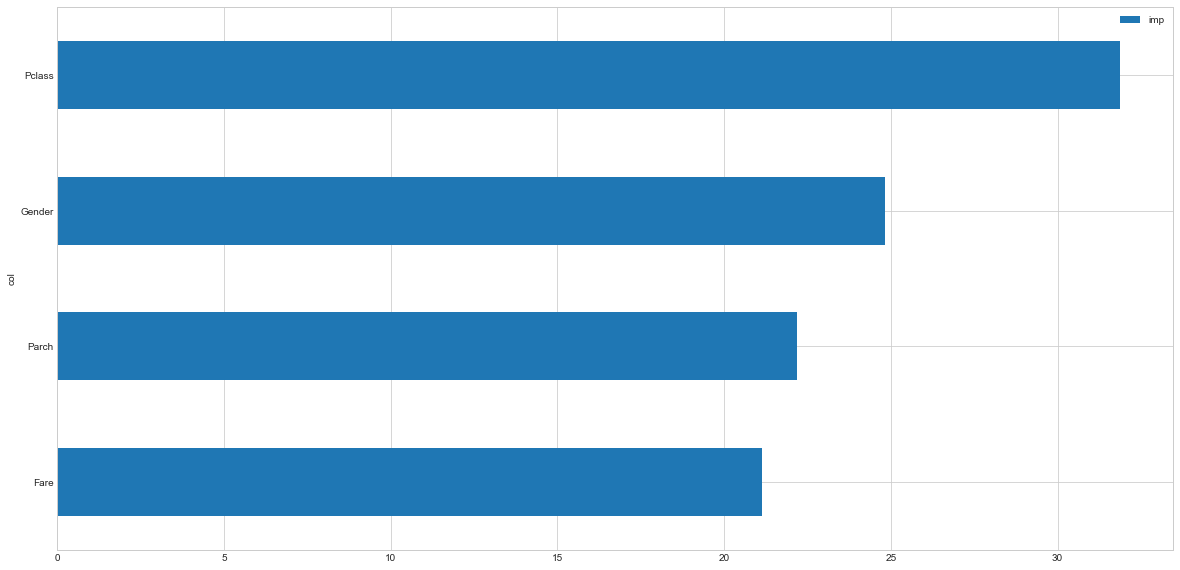

In [237]:
# Plot the feature importance scores
feature_importance(catboost_model, X_train)

What inside this give to us? Probably with a larger data set with a lot more of features, we could know wich feature we can remove an re train the molde. This could give us better resutls. 

**Precision and Recall**

Precision and recall are two metrics which are used for cases where you have have an imbalanced classification problem.

For example, you may have 100,000 people and only 1 of them gets a certain disease. If your model predicts that all people don't have the disease, it only misses 1 in 100,000 so its accuracy is 99.999%. But this isn't really helpful.

This is where precision an recall come in.

Recall = a metric which measures a models ability to find all the relevant cases in a dataset.

Recall would be the models ability to find the 1 person in 100,000 who has the disease.

Precision = a metric which measures a models ability to correctly identify only relevant instances.

In our example, Precision would be if the model found the 1 person who had the disease, did they actually have the disease.

Combining the precision and recall, gives an F1 score.

These metrics will all fall between 0 and 1, with a higher value being better.

Although, they don't necessarily need to come into play for our Titantic problem, they're worth remembering for your future work.



In [238]:
metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.8762381657527946
Recall: 0.7611098039215686
F1: 0.8143804733345942
AUC: 0.921917295260545


**SUBMITION! Finally...**

We need to use our selected model to predit the chance of survival in the test data set.

In [239]:
wanted_test_columns = df_con.drop("Survived", axis=1).columns

In [240]:
#change the name of the sex column for gender

df_test_copy = test
df_test_copy['Gender'] = test['Sex']
df_test_copy.drop('Sex', axis=1)



,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,male
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,female
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,male
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,male
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,female
5,897,3,"Svensson, Mr. Johan Cervin",14.0,0,0,7538,9.2250,NaN,S,male
6,898,3,"Connolly, Miss. Kate",30.0,0,0,330972,7.6292,NaN,Q,female
7,899,2,"Caldwell, Mr. Albert Francis",26.0,1,1,248738,29.0000,NaN,S,male
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",18.0,0,0,2657,7.2292,NaN,C,female
9,901,3,"Davies, Mr. John Samuel",21.0,2,0,A/4 48871,24.1500,NaN,S,male


In [241]:
# One hot encode the columns in the test data frame (like X_train)
test_embarked_one_hot = pd.get_dummies(df_test_copy['Embarked'], 
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(df_test_copy['Gender'], 
                                prefix='gender')

test_plcass_one_hot = pd.get_dummies(df_test_copy['Pclass'], 
                                   prefix='pclass')

In [242]:
# Combine the test one hot encoded columns with test
test = pd.concat([test, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_plcass_one_hot], axis=1)

In [243]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,embarked_C,embarked_Q,embarked_S,gender_female,gender_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,male,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,female,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,male,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,male,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,female,0,0,1,1,0,0,0,1


In [244]:
# Create a list of columns to be used for the predictions
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['Pclass', 'Gender', 'Parch', 'Fare'], dtype='object')

In [245]:
# Make a prediction using the CatBoost model on the wanted columns
predictions = catboost_model.predict(test[wanted_test_columns].apply(LabelEncoder().fit_transform))

In [246]:
predictions

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [247]:
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions
submission.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0


In [248]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [249]:
submission['Survived'] = submission['Survived'].astype(int)

In [250]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [251]:
# for Kaggle submisison
submission.to_csv('output/gender_submission.csv', index=False)
print('Submission CSV is ready!')

# Check the submission csv to make sure it's in the right format
submissions_check = pd.read_csv("output/gender_submission.csv")
submissions_check.head()
len(submissions_check)

Submission CSV is ready!


418